In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install python-dotenv

In [8]:
from dotenv import load_dotenv

# Path to your .env in Drive
env_path = '/content/drive/MyDrive/ML Projects/Real-Time Object Detection in Autonomous Vehicles YOLOv8/.env'
load_dotenv(env_path)

api_key = os.getenv('API_KEY')

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key= api_key)
project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Car-2 in yolov8:: 100%|██████████| 60006/60006 [01:13<00:00, 815.37it/s] 


In [11]:
import os
import shutil
import random

def split_dataset(source_path, target_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    random.seed(seed)

    images_dir = os.path.join(source_path, "images")
    labels_dir = os.path.join(source_path, "labels")

    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
    random.shuffle(image_files)

    total = len(image_files)
    train_split = int(total * train_ratio)
    val_split = int(total * (train_ratio + val_ratio))

    splits = {
        "train": image_files[:train_split],
        "valid": image_files[train_split:val_split],
        "test": image_files[val_split:]
    }

    for split in splits:
        for subfolder in ["images", "labels"]:
            os.makedirs(os.path.join(target_path, split, subfolder), exist_ok=True)

        for img_file in splits[split]:
            label_file = img_file.replace(".jpg", ".txt")
            shutil.copy(os.path.join(images_dir, img_file),
                        os.path.join(target_path, split, "images", img_file))
            shutil.copy(os.path.join(labels_dir, label_file),
                        os.path.join(target_path, split, "labels", label_file))

    print(f"✅ Split completed:\nTrain: {len(splits['train'])}, Valid: {len(splits['valid'])}, Test: {len(splits['test'])}")



split_dataset("/content/datasets/Self-Driving-Car-2/export","/content/datasets/Self-Driving-Car-2")


✅ Split completed:
Train: 21000, Valid: 4500, Test: 4500


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.167 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/datasets/Self-Driving-Car-2/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

In [ ]:
!ls {HOME}/runs/detect/train/


args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1752775332.f4afff18fe7c.2801.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


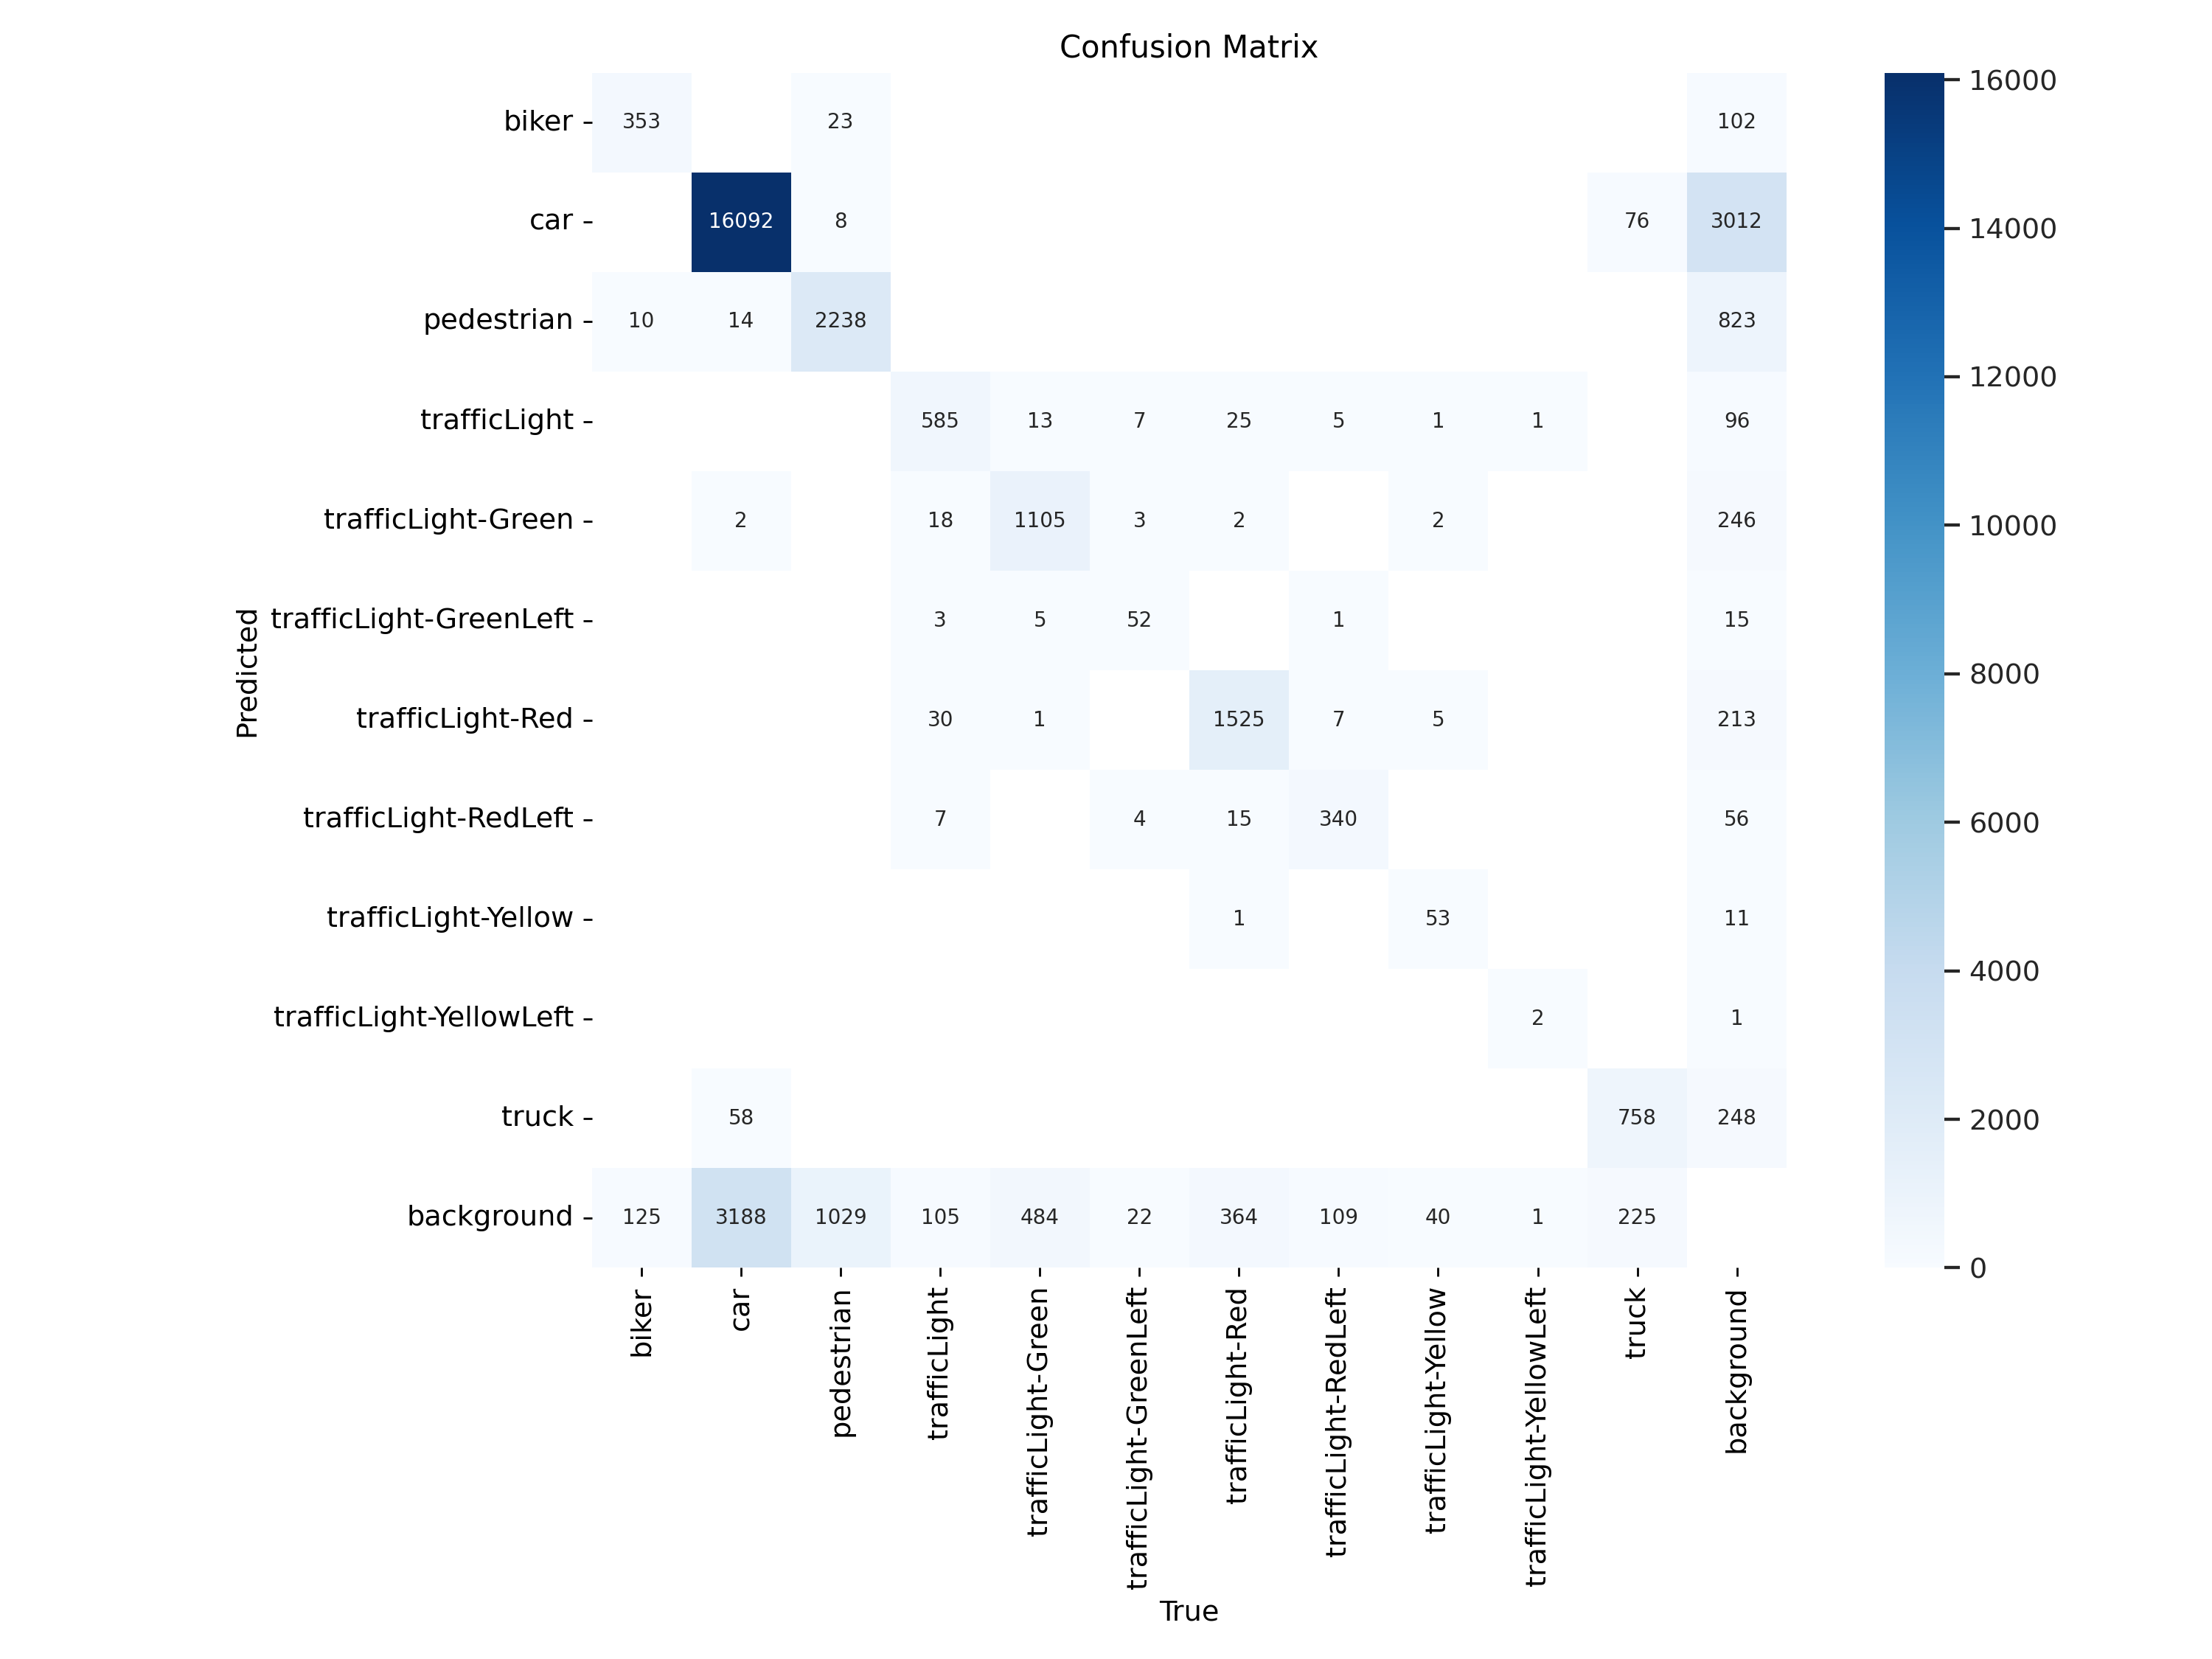

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)


/content


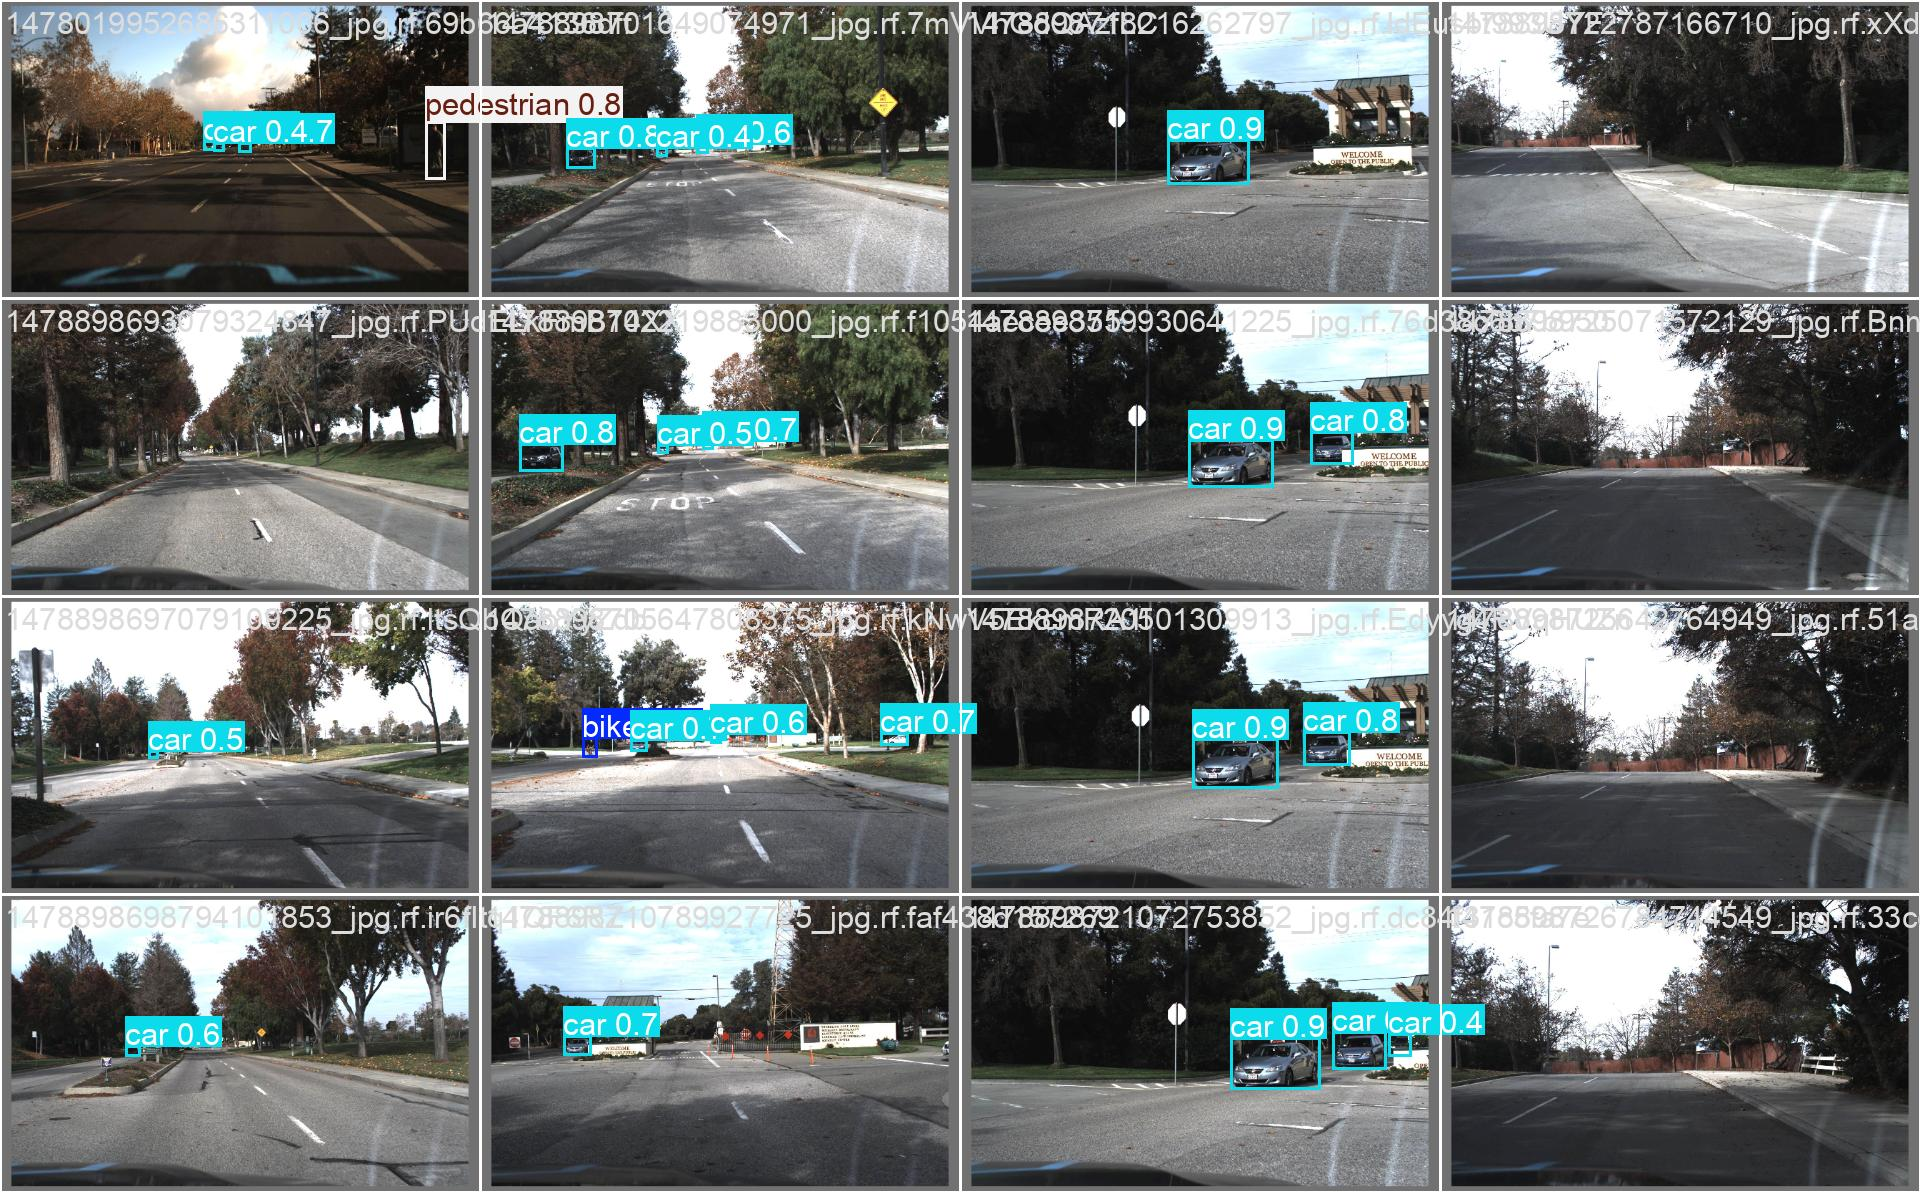

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Self-Driving-Car-2/valid/labels.cache... 4500 images, 549 backgrounds, 0 corrupt: 100% 4500/4500 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Self-Driving-Car-2/valid/images/1478898145212453716_jpg.rf.05396a187347a3c76ae173d456c9e4e0.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 282/282 [01:07<00:00,  4.18it/s]
                   all       4500      29142      0.813      0.695      0.749      0.436
                 biker        310        488      0.771      0.711      0.748      0.446
                   car       3879      19354      0.859      0.824      0.863      0.595
            pedestrian       1053       3298      0.772      0.653      0.717      0.389
          trafficLight        45

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

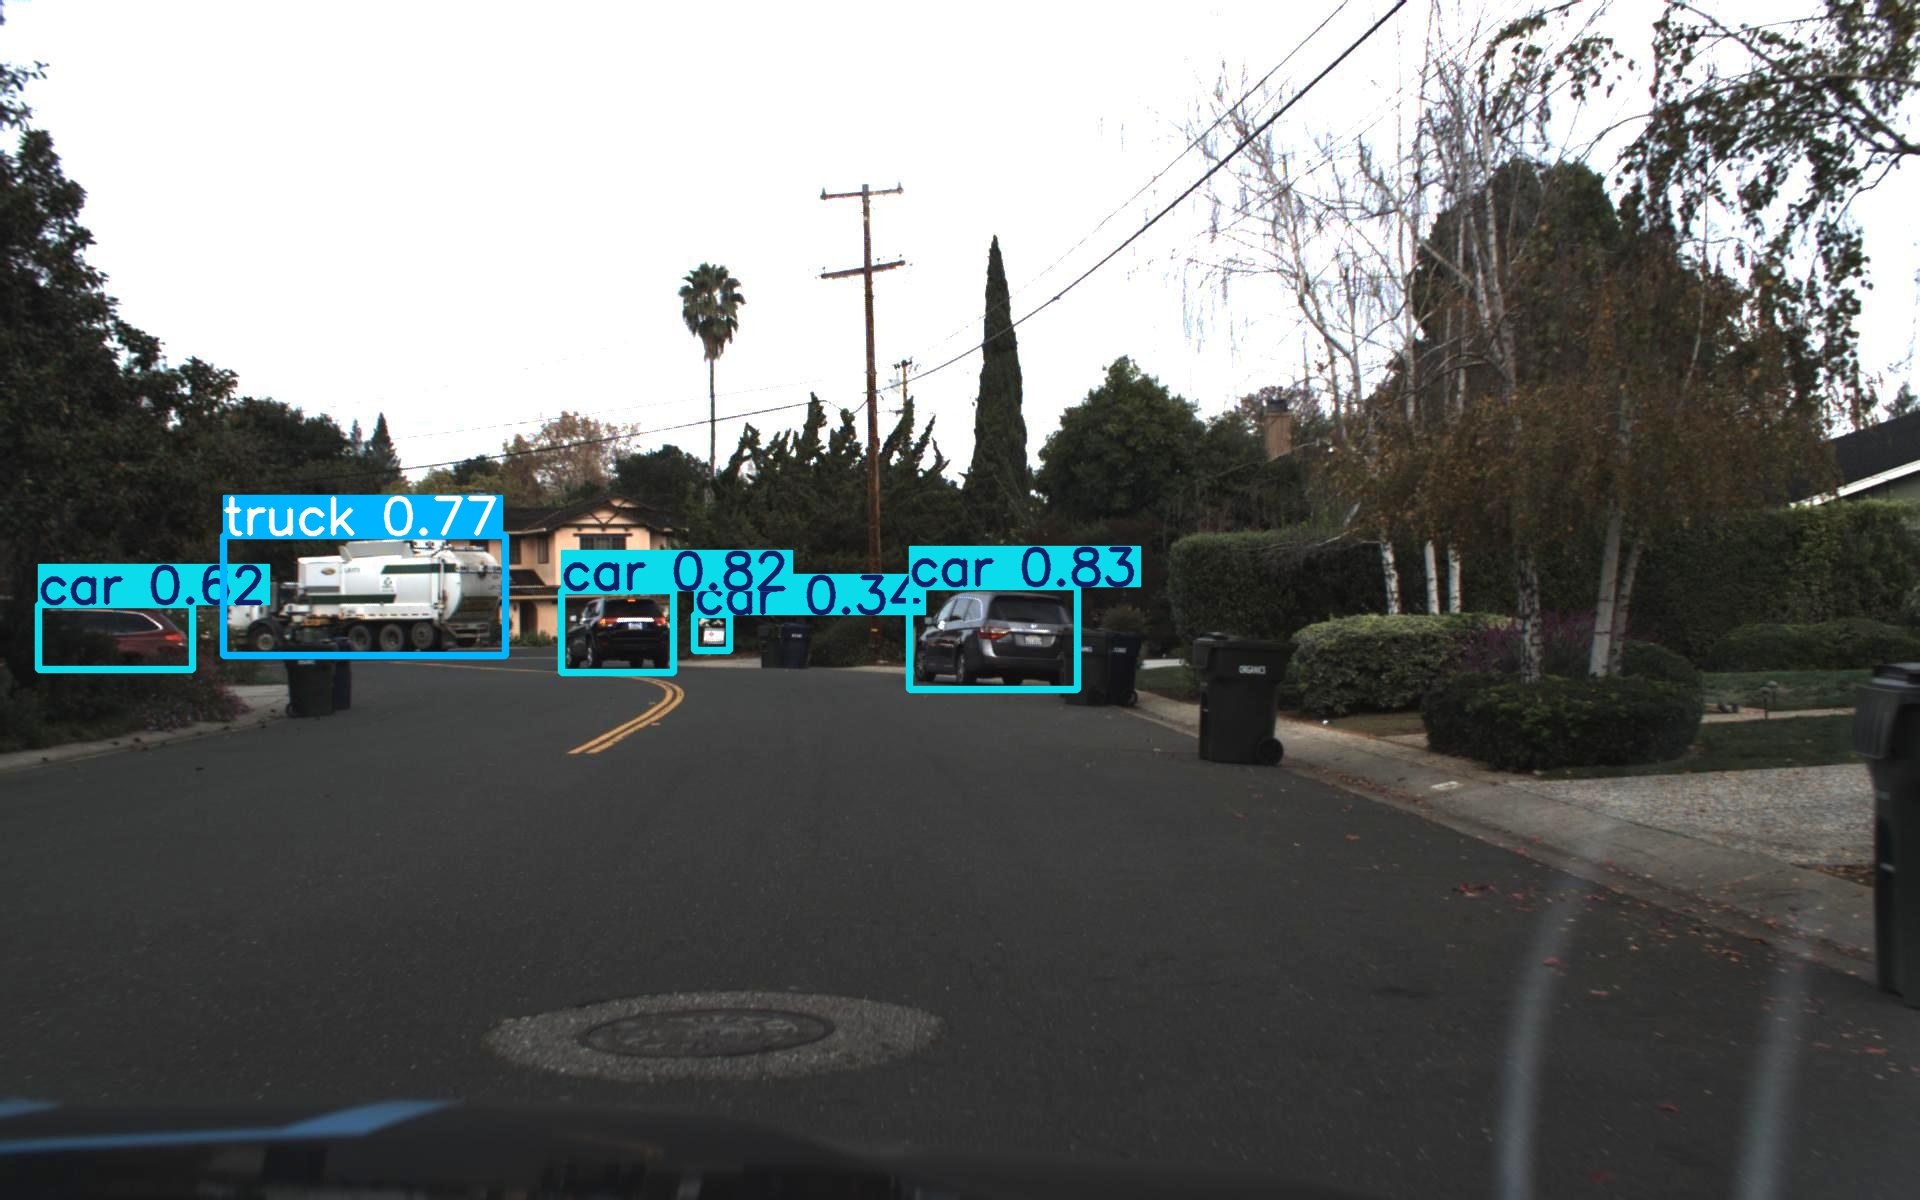

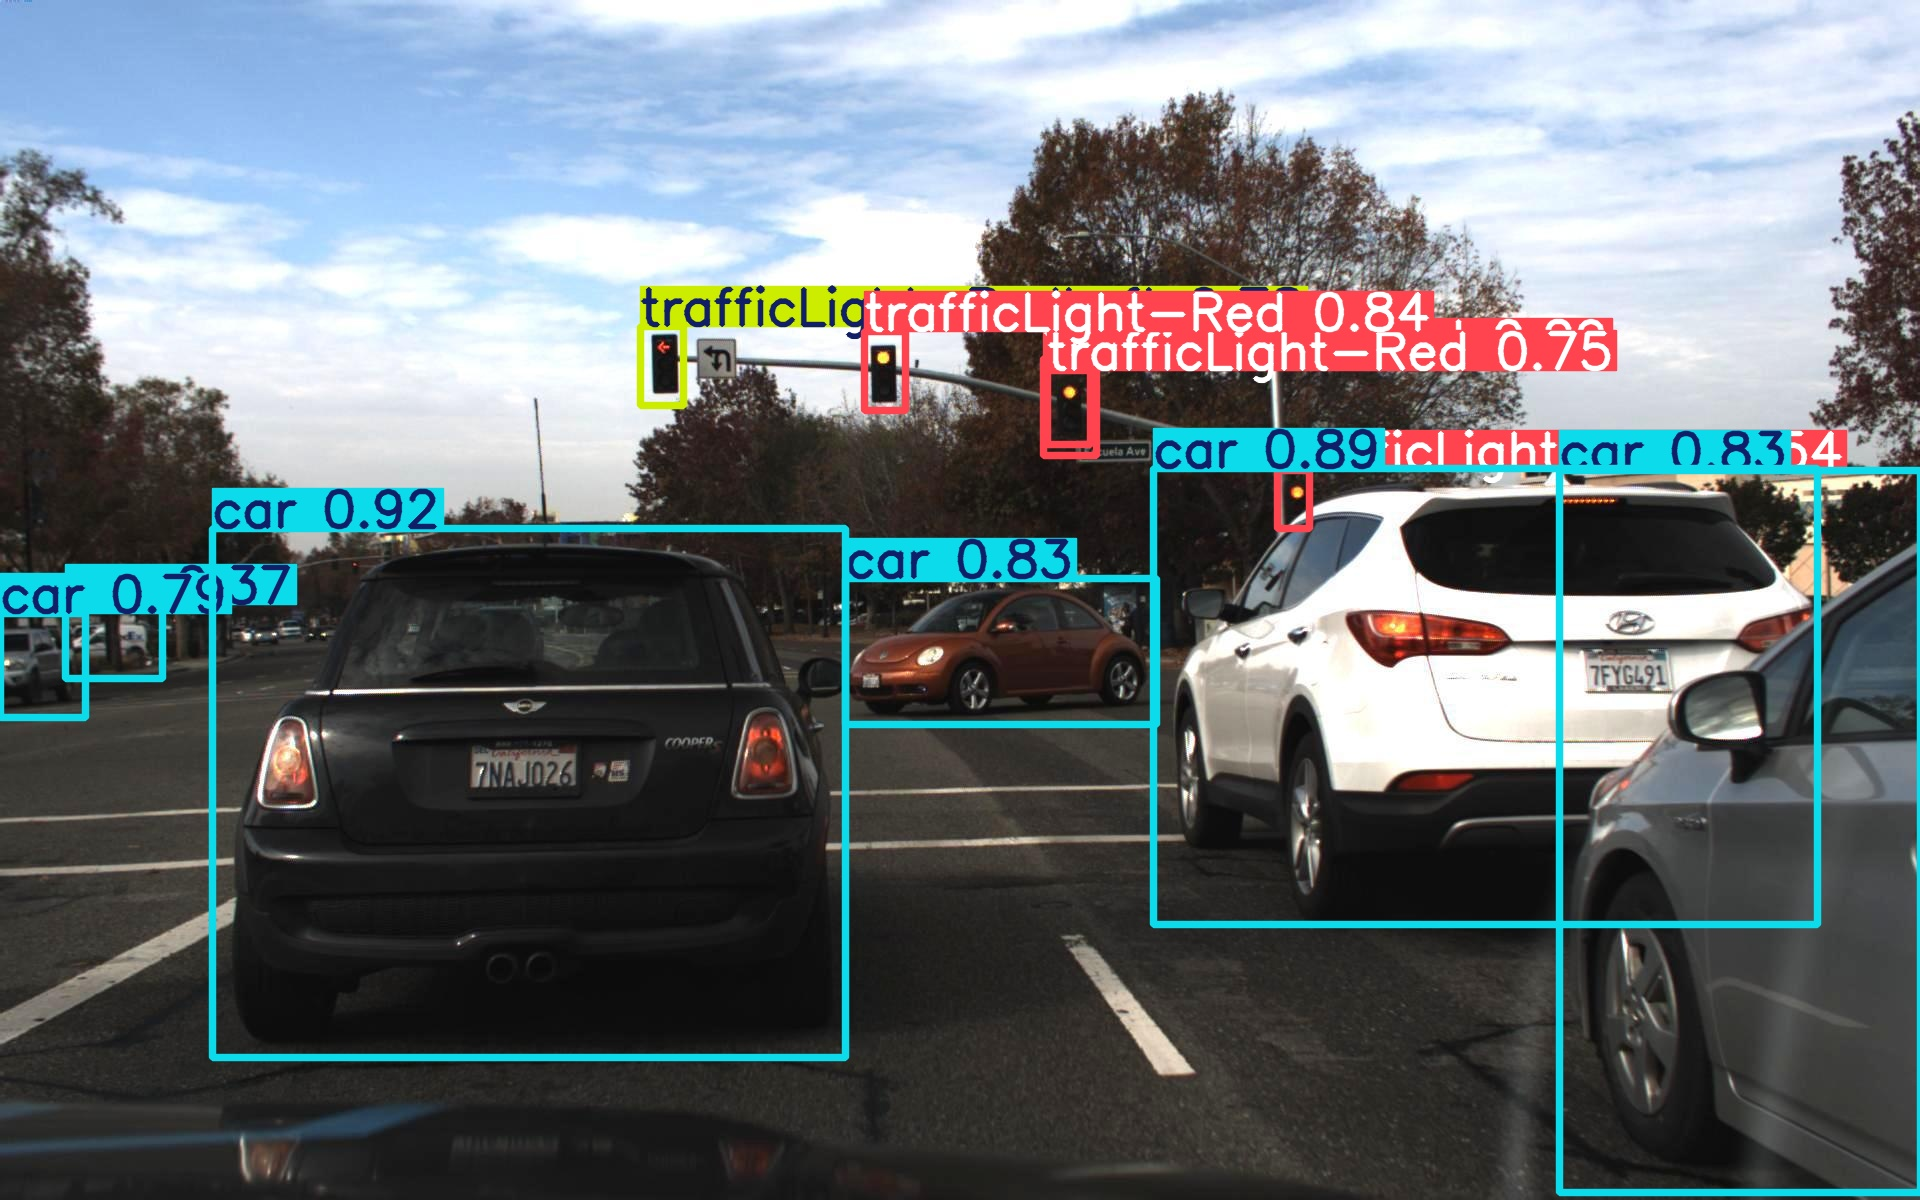

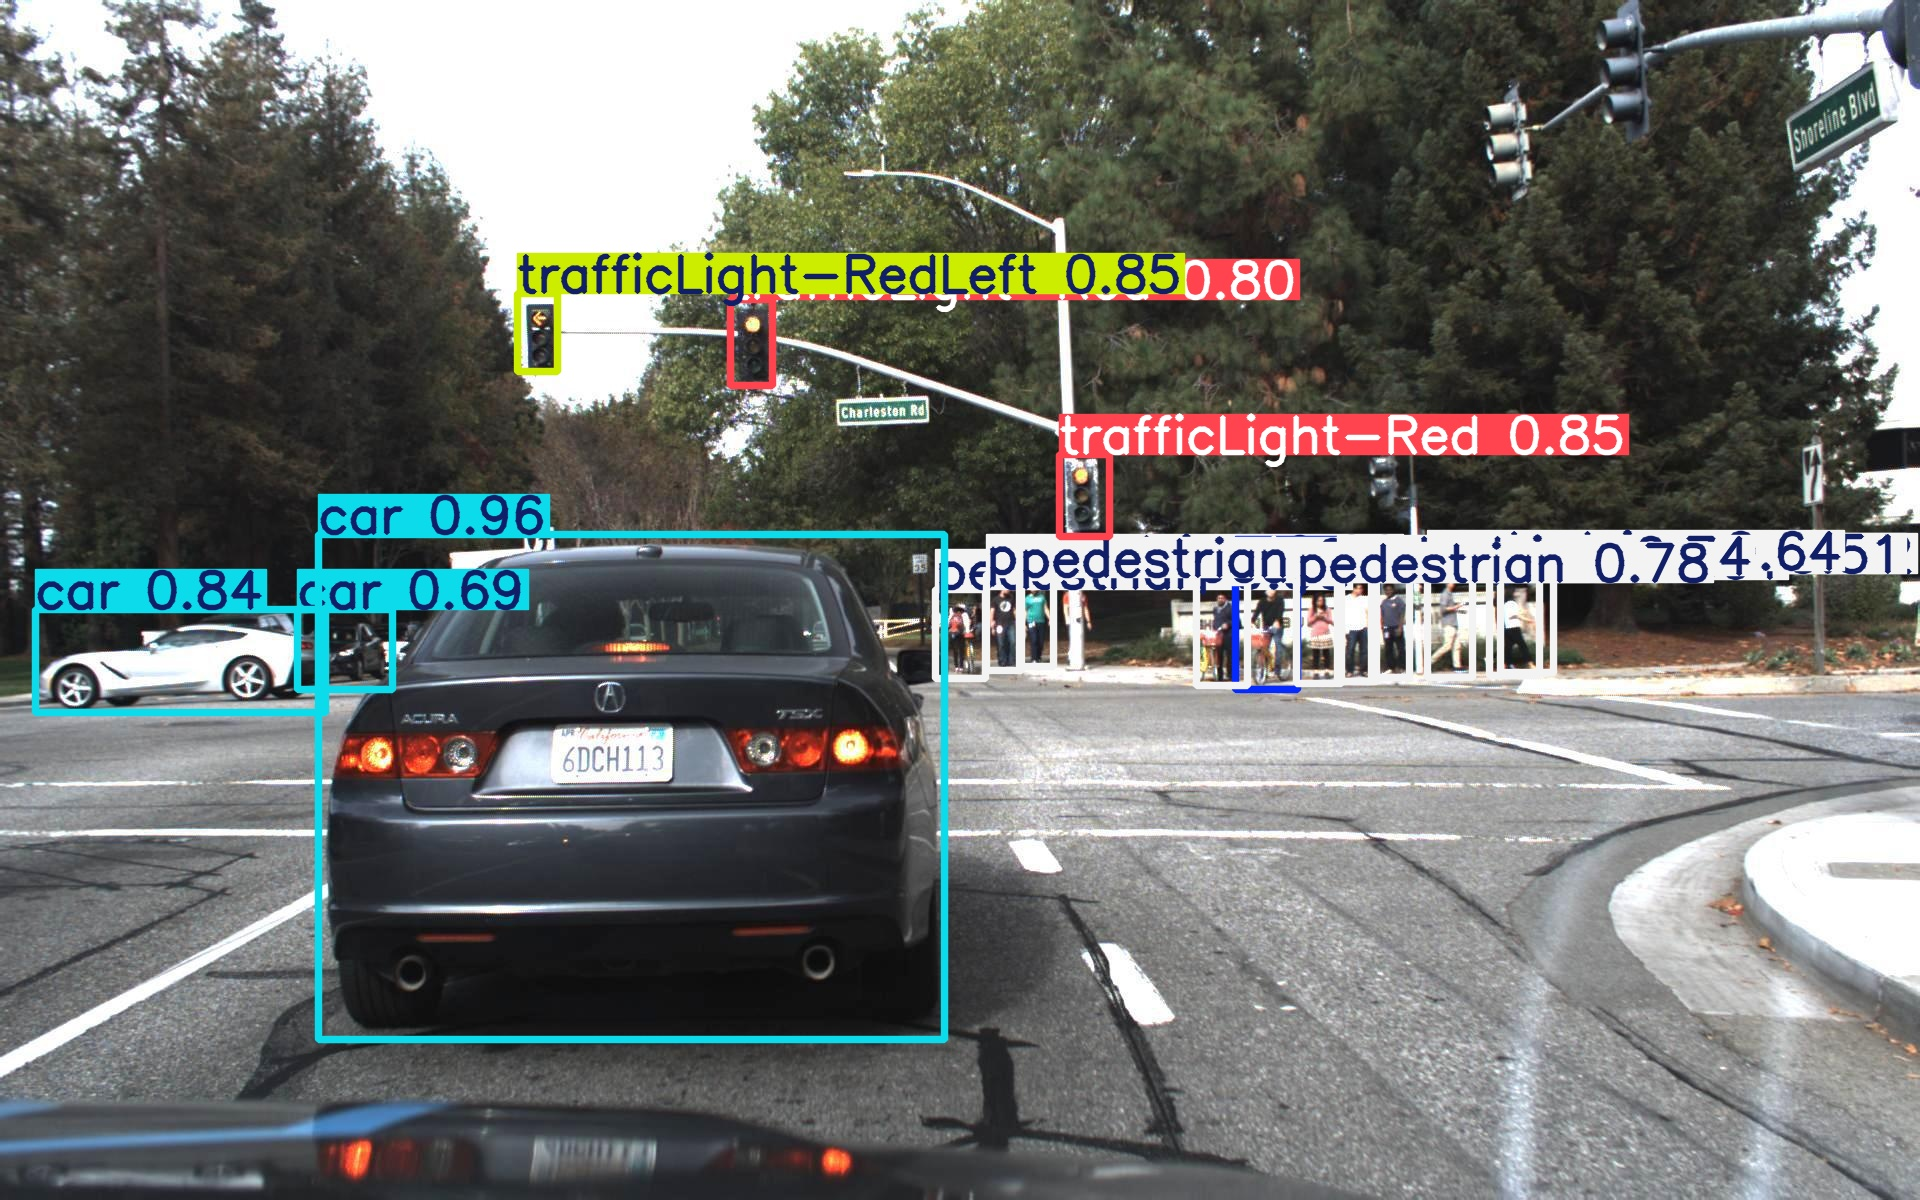

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")